# Inaugural Project

Import and set magics:

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

## Question 1

First of all we begin this project by importing the packages that we will use. The parameter values are then defined as given in the project describtion. We solve the maximization problem given the parameter values. The optimal level of consumption and labor are c = 1.24 and l = 0.40 which gives us a utility of 0.17.

In [23]:
# First the initial variables that are subject to change are defined
w = 1
e = 0.3

# The fixed parameter values are
m = 1
v = 10
t0 = 0.4
t1 = 0.1
k = 0.4

# Now we construct the functions
def c_star(w,l,m,t0,t1,k):
    return m+w*l-(t0*w*l+t1*max(w*l-k,0))

def u_star(c,l,v,e):
    return np.log(c)-v*l**(1+1/e)/(1+1/e)

# Objective function
def value_of_choice(l,v,e):
    c = c_star(w,l,m,t0,t1,k)
    return -u_star(c,l,v,e)

# Call solver
sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(v,e))

# Unpack solution
l = sol_case1.x
c = c_star(w,l,m,t0,t1,k)
u = u_star(c,l,v,e)

# Print solutions
def print_solution(c,l,u):
    print(f'c = {c:0.2f}')
    print(f'l = {l:0.2f}')
    print(f'u = {u:0.2f}')
    
print_solution(c,l,u)

c = 1.24
l = 0.40
u = 0.17


## Question 2

I this question we want to show consumption and labor as functions of wage. Overall both consumption and labor are increasing in wages which is what we expected beforehand. 

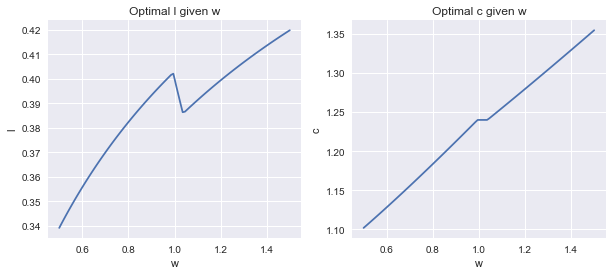

In [24]:
# Optimal choice as function of wage
l_val = []
c_val = []
w_val = []

for i in np.linspace(0.5,1.5,100):
    w = i

    sol_case1 = optimize.minimize_scalar(value_of_choice,
    method='bounded',
    bounds=(0,1),args=(v,e))
    
    w_val.append(i)
    l_val.append(sol_case1.x)
    c_val.append(c_star(sol_case1.x,i,m,t0,t1,k))


c_val
l_val
w_val

# Figure

plt.style.use("seaborn")

# Creating the figure
fig = plt.figure(figsize=(10,4))

# The left plot
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_val,l_val)

ax_left.set_title('Optimal l given w')
ax_left.set_xlabel('w')
ax_left.set_ylabel('l')
ax_left.grid(True)

# The right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_val,c_val)

ax_right.set_title('Optimal c given w')
ax_right.set_xlabel('w')
ax_right.set_ylabel('c')
ax_right.grid(True)

## Question 3

Now we run the utility function for 10.000 individuals with a uniform wage distribution between 0.5 and 1.5, where the elasticity of labor supply is 0.3. This gives us a total tax revenue of 2000.7.

In [28]:
# Drawing a random number
np.random.seed(117)
c_i = []
l_i = []
w_i = []

# Drawing a random wage for each i in the population with 10.000 individuals
for i in range(10000):
    w = np.random.uniform(low=0.5,high=1.5)

    sol_case1 = optimize.minimize_scalar(value_of_choice,
    method='bounded',
    bounds=(0,1),args=(v,e))

    w_i.append(w)
    l_i.append(sol_case1.x)
    c_i.append(c_star(sol_case1.x,w,m,t0,t1,k))

def tax_func(c,l,w,t0,t1,k):
    return t0*w*l+t1*np.max(w*l-k,0)

tax = 0
for i in range(10000):
    tax += tax_func(w_i[i],l_i[i],c_i[i],t0,t1,k)
print(f'Total tax revenue = {tax:.3f}')

Total tax revenue = 2000.722


## Question 4

We do the same as in Question 3 with a lower elasticity of labor supply being 0.1. This gives a higher tax revenue of 4608.3. 

In [29]:
# Defining the new elasticity of labor supply
e_new = 0.1

# Defining new functions
def u_star_new(c,l,v,e_new):
    return np.log(c)-v*l**(1+1/e_new)/(1+1/e_new)

def value_of_choice_new(l,v,e_new):
    c = c_star(w,l,m,t0,t1,k)
    return -u_star_new(c,l,v,e_new)

sol_case2 = optimize.minimize_scalar(
    value_of_choice_new,method='bounded',
    bounds=(0,1),args=(v,e_new))

# Drawing a random number
np.random.seed(117)
c_i_new = []
l_i_new = []
w_i_new = []

# Drawing a random wage for each i in the population with 10.000 individuals
for i in range(10000):
    w = np.random.uniform(low=0.5,high=1.5)

    sol_case2 = optimize.minimize_scalar(value_of_choice_new,
    method='bounded',
    bounds=(0,1),args=(v,e_new))

    w_i_new.append(w)
    l_i_new.append(sol_case2.x)
    c_i_new.append(c_star(sol_case2.x,w,m,t0,t1,k))

def tax_func_new(c,l,w,t0,t1,k):
    return t0*w*l+t1*np.max(w*l-k,0)

tax_new = 0
for i in range(10000):
    tax_new += tax_func_new(w_i_new[i],l_i_new[i],c_i_new[i],t0,t1,k)
print(f'New total tax revenue = {tax_new:.3f}')

New total tax revenue = 4608.280


## Question 5

Because of the Laffer curve we expect a maximum level of tax revenue for both of the income taxes. The tax revenue will rise with a higher tax until a certain point where the tax revenue will fall again if the tax is raised further. 

If we plot different values of t0 in Question 3, we find the Laffer curve. This is shown in the figure below, where the optimal level of the standard income tax is around 0.75.

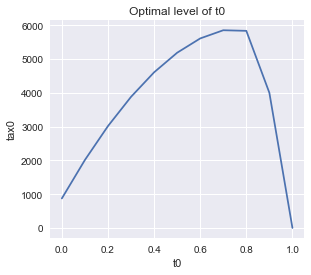

In [73]:
t0 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
tax0 = [873.4,2012.5,3016.0,3882.3,4608.3,5188.5,5612.1,5854.6,5837.1,4001.2,0.0]

plt.style.use("seaborn")

# Creating the figure
fig = plt.figure(figsize=(10,4))

# The left plot
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(t0,tax)

ax_left.set_title('Optimal level of t0')
ax_left.set_xlabel('t0')
ax_left.set_ylabel('tax0')
ax_left.grid(True)